importing the all necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data_frame=pd.read_csv("/content/adult 3.csv")

In [ ]:
data_frame.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [ ]:
data_frame.shape

(9615, 15)

#1.Data Cleaning

checking whether the dataset has any missing values in the data_frame ** HANDLING MISSING VALUES**

if  yes:    precedding with the techniques

else:   continuing with the next steps

continuing with handling missing value techniques {

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9615 entries, 0 to 9614
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9615 non-null   int64  
 1   workclass        9615 non-null   object 
 2   fnlwgt           9615 non-null   int64  
 3   education        9615 non-null   object 
 4   educational-num  9615 non-null   int64  
 5   marital-status   9615 non-null   object 
 6   occupation       9615 non-null   object 
 7   relationship     9615 non-null   object 
 8   race             9614 non-null   object 
 9   gender           9614 non-null   object 
 10  capital-gain     9614 non-null   float64
 11  capital-loss     9614 non-null   float64
 12  hours-per-week   9614 non-null   float64
 13  native-country   9614 non-null   object 
 14  income           9614 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.1+ MB


In [ ]:
rows_all_null = data_frame[data_frame.isnull().any(axis=1)]
print(rows_all_null)


      age workclass  fnlwgt   education  educational-num marital-status  \
9614   49   Private  123681  Assoc-acdm               12      Separated   

     occupation relationship race gender  capital-gain  capital-loss  \
9614      Sales    Unmarried  NaN    NaN           NaN           NaN   

      hours-per-week native-country income  
9614             NaN            NaN    NaN  


its just one row that has null values ,which is very less percentage compared to the dataset,so trying to delete the row

In [ ]:
data_frame.dropna(inplace=True)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9614 entries, 0 to 9613
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9614 non-null   int64  
 1   workclass        9614 non-null   object 
 2   fnlwgt           9614 non-null   int64  
 3   education        9614 non-null   object 
 4   educational-num  9614 non-null   int64  
 5   marital-status   9614 non-null   object 
 6   occupation       9614 non-null   object 
 7   relationship     9614 non-null   object 
 8   race             9614 non-null   object 
 9   gender           9614 non-null   object 
 10  capital-gain     9614 non-null   float64
 11  capital-loss     9614 non-null   float64
 12  hours-per-week   9614 non-null   float64
 13  native-country   9614 non-null   object 
 14  income           9614 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.2+ MB


In [ ]:
for col in data_frame.columns :
  if data_frame[col].dtype=="object":
   print(data_frame[col].value_counts())
   print()

workclass
Private             6573
Self-emp-not-inc     782
Local-gov            609
?                    584
State-gov            429
Self-emp-inc         353
Federal-gov          279
Without-pay            4
Never-worked           1
Name: count, dtype: int64

education
HS-grad         3121
Some-college    2125
Bachelors       1598
Masters          545
Assoc-voc        412
11th             358
Assoc-acdm       314
10th             273
7th-8th          186
Prof-school      146
9th              143
12th             121
Doctorate        106
5th-6th           98
1st-4th           48
Preschool         20
Name: count, dtype: int64

marital-status
Married-civ-spouse       4307
Never-married            3238
Divorced                 1303
Widowed                   330
Separated                 297
Married-spouse-absent     130
Married-AF-spouse           9
Name: count, dtype: int64

occupation
Prof-specialty       1222
Exec-managerial      1213
Craft-repair         1183
Adm-clerical         107

In [ ]:
data_frame['workclass'].replace({"?" : "other"},inplace=True)
data_frame['occupation'].replace({"?" : "other_occupation"},inplace=True)
data_frame['race'].replace({"other" : "some-other"},inplace=True)
data_frame['native-country'].replace({"?" : "unknown"},inplace=True)
unwanted = ['Never-worked', 'Without-pay','Armed-Forces' ,'Married-AF-spouse','Priv-house-serv']
data_frame = data_frame[~data_frame['workclass'].isin(unwanted)]
data_frame = data_frame[~data_frame['occupation'].isin(unwanted)]
data_frame = data_frame[~data_frame['marital-status'].isin(unwanted)]




/tmp/ipython-input-54-340873563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['workclass'].replace({"?" : "other"},inplace=True)
/tmp/ipython-input-54-340873563.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

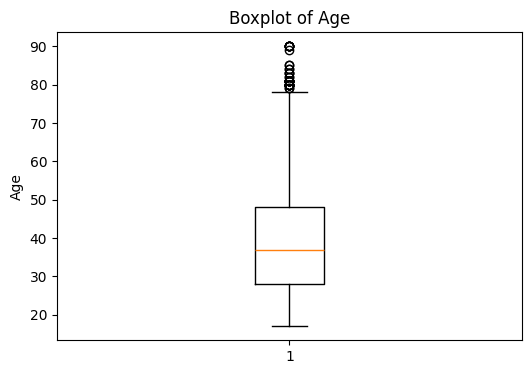

In [ ]:
import matplotlib.pyplot as plt

# Example for a single column (e.g., 'age')
plt.figure(figsize=(6, 4))
plt.boxplot(data_frame['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()


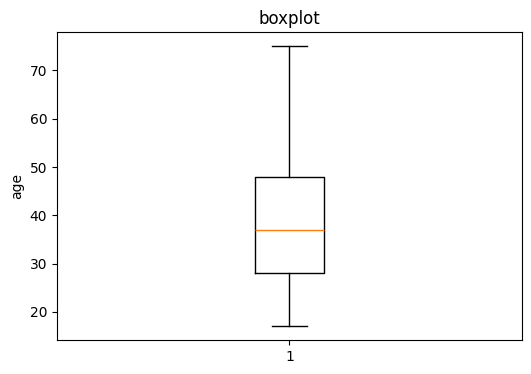

In [ ]:
data_frame=data_frame[(data_frame['age']>=17) & (data_frame['age']<=75)]
plt.figure(figsize=(6,4))
plt.boxplot(data_frame['age'])
plt.title("boxplot")
plt.ylabel("age")
plt.show()

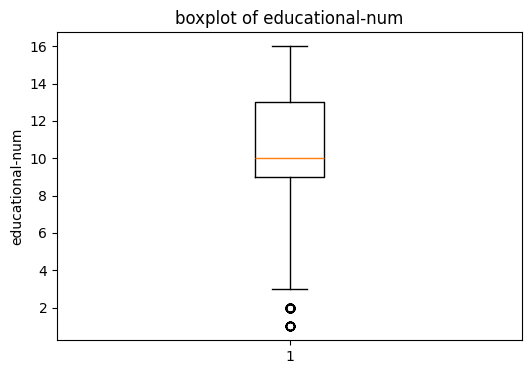

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(data_frame['educational-num'])
plt.title("boxplot of educational-num")
plt.ylabel("educational-num")
plt.show()

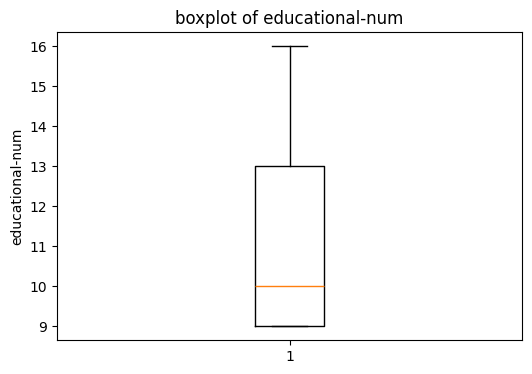

In [ ]:
data_frame=data_frame[data_frame['educational-num']>=9]
plt.figure(figsize=(6,4))
plt.boxplot(data_frame['educational-num'])
plt.title("boxplot of educational-num")
plt.ylabel("educational-num")
plt.show()

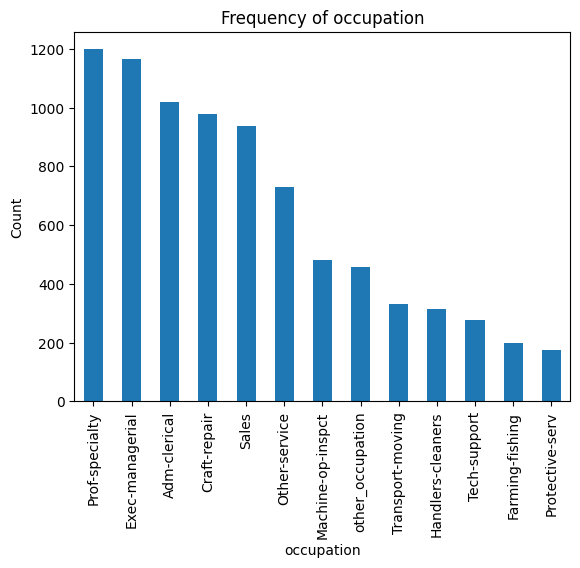

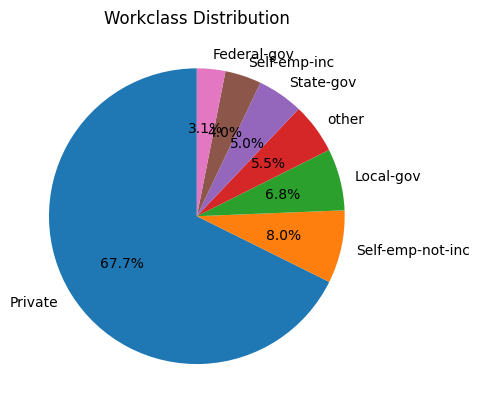

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for a categorical column, e.g., 'workclass'
data_frame['occupation'].value_counts().plot(kind='bar')
plt.title('Frequency of occupation')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.show()

# Pie chart for a categorical column
data_frame['workclass'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Workclass Distribution')
plt.ylabel('')
plt.show()




In [ ]:
occupation_labels = [
    'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial',
    'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical',
    'Farming-fishing', 'Transport-moving', 'Protective-serv',
    'other_occupation'
]
occupation_mapping = {name: i for i, name in enumerate(occupation_labels)}

education_mapping = {
     "HS-grad": 9, "Some-college": 10, "Assoc-voc": 11,
    "Assoc-acdm": 12, "Bachelors": 13, "Masters": 14, "Doctorate": 15, "Prof-school": 16
}

# Assume the dataframe uses correct encodings, if not, do so:
data_frame['occupation'] = data_frame['occupation'].map(occupation_mapping)
data_frame['educational-num'] = data_frame['education'].map(education_mapping)
data_frame['gender'] = data_frame['gender'].map({'Male': 1, 'Female': 0})
data_frame['income_binary']=data_frame['income'].map({'<=50K': 0,'>50K': 1})

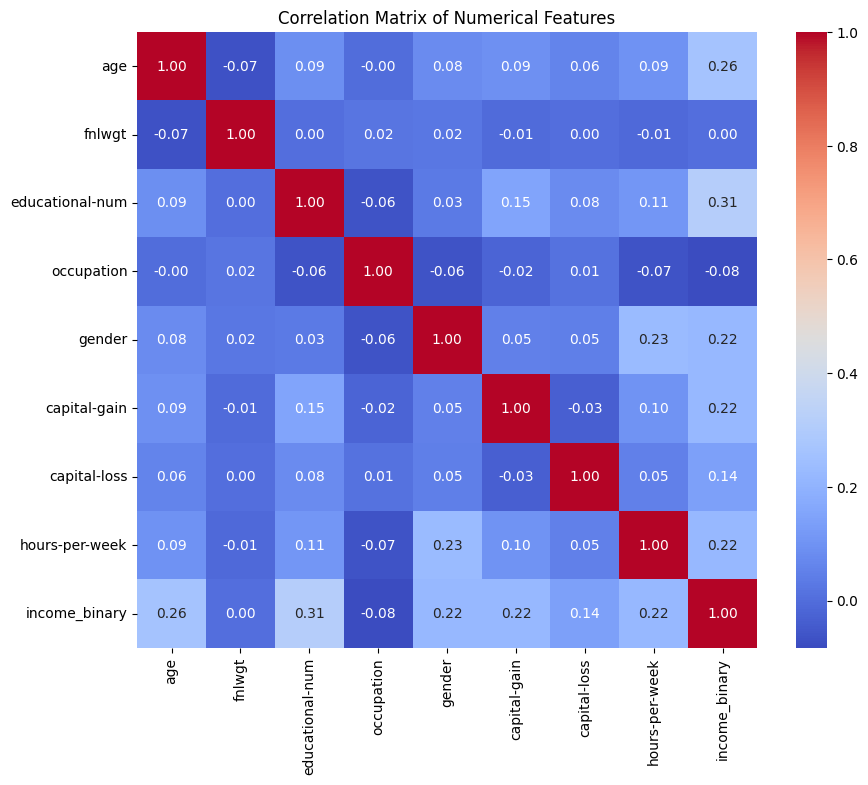

In [ ]:
import seaborn as sns

corr = data_frame.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:

data_frame=data_frame.drop(columns=['race','fnlwgt','marital-status','education','workclass','relationship','income','capital-gain','capital-loss','native-country'])

In [ ]:
data_frame

,age,educational-num,occupation,gender,hours-per-week,income_binary
1,38,9,9,1,50.0,0
2,28,12,11,1,40.0,1
3,44,10,7,1,40.0,1
4,18,10,12,0,30.0,0
6,29,9,12,1,40.0,0
...,...,...,...,...,...,...
9609,21,10,5,0,25.0,0
9610,25,13,4,1,40.0,0
9611,20,9,2,0,40.0,0
9612,59,12,10,1,32.0,1


In [ ]:
features_order = ["age", "educational-num", "occupation", "gender", "hours-per-week"]
X = data_frame[features_order]
y = data_frame['income_binary']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Helps maintain initial label ratios!

# Check ratio in y_train
print(y_train.value_counts())

income_binary
0    4874
1    1738
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)



we can clearly see that unbalanced label classes inthe taining dataset,which might lead to some bias in it,so we tryto maintain equal numbers of sample for each class

In [ ]:
#data agumentation
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)


print(y_train_sm.value_counts())



income_binary
0    4874
1    4874
Name: count, dtype: int64


now procedding with the model selection for the dataset

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import numpy as np

# Example model dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# 1. Model Selection with cross-validation (on training data only)
cv_results = {}
print("Cross-validation results:")
for name, model in models.items():
    # 5-fold cross-validation for f1-score (use 'accuracy' or other metric as desired)
    scores = cross_val_score(model, X_train_sm, y_train_sm, cv=5, scoring='f1')
    cv_results[name] = scores
    print(f"{name}: Mean F1 = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}, Scores = {scores}")

# Select best model by mean F1-score during cross-validation
best_model_name = max(cv_results, key=lambda k: np.mean(cv_results[k]))
print(f"\nBest model by mean F1-score (cv): {best_model_name}")

# 2. Training best model on ALL training data
best_model = models[best_model_name]
best_model.fit(X_train_sm, y_train_sm)

# 3. Evaluate on test set
y_pred = best_model.predict(X_test_scaled)
acc   = accuracy_score(y_test, y_pred)
prec  = precision_score(y_test, y_pred, average='binary')    # use 'weighted' or 'macro' for multiclass
rec   = recall_score(y_test, y_pred, average='binary')
f1    = f1_score(y_test, y_pred, average='binary')
cm    = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\n--- Final Evaluation on Test Set ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")
print("Classification Report:\n", report)


Cross-validation results:
Logistic Regression: Mean F1 = 0.7248, Std = 0.0036, Scores = [0.73158426 0.72511604 0.72355289 0.72263868 0.72120896]
Random Forest: Mean F1 = 0.8097, Std = 0.0694, Scores = [0.71750433 0.73270614 0.86042065 0.86420951 0.8738521 ]
Gradient Boosting: Mean F1 = 0.7991, Std = 0.0424, Scores = [0.74829217 0.74629913 0.83395872 0.82853094 0.8384913 ]
Decision Tree: Mean F1 = 0.7690, Std = 0.0810, Scores = [0.66587537 0.67397576 0.8372093  0.83861386 0.82938856]
Support Vector Machine: Mean F1 = 0.7648, Std = 0.0072, Scores = [0.75633528 0.75655074 0.76988636 0.76717557 0.7742871 ]
K-Neighbors: Mean F1 = 0.7951, Std = 0.0189, Scores = [0.78230958 0.76392311 0.81255858 0.80925401 0.80741797]
Naive Bayes: Mean F1 = 0.7412, Std = 0.0080, Scores = [0.74539113 0.73190215 0.74490786 0.73194857 0.75190259]

Best model by mean F1-score (cv): Random Forest

--- Final Evaluation on Test Set ---
Accuracy:  0.7689
Precision: 0.5631
Recall:    0.5346
F1-score:  0.5485
Confusion

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(
    rf,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train_sm, y_train_sm)

best_rf = grid.best_estimator_
print("Best Params:", grid.best_params_)

from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn.metrics import f1_score

# Get cross-validated predicted probabilities of class 1 using best estimator from grid search
y_train_pred_proba = cross_val_predict(
    best_rf, X_train_sm, y_train_sm, cv=5, method='predict_proba'
)[:, 1]

thresholds = np.arange(0.1, 0.91, 0.01)
f1s = []
for thr in thresholds:
    y_pred = (y_train_pred_proba >= thr).astype(int)
    f1s.append(f1_score(y_train_sm, y_pred))

best_index = np.argmax(f1s)
best_threshold = thresholds[best_index]
print(f"Best threshold from train CV: {best_threshold:.2f}, F1: {f1s[best_index]:.4f}")




Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best threshold from train CV: 0.42, F1: 0.8281


In [ ]:
# Get predicted probabilities on the untouched test set
y_test_proba = best_rf.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1219
           1       0.52      0.69      0.59       434

    accuracy                           0.75      1653
   macro avg       0.69      0.73      0.70      1653
weighted avg       0.78      0.75      0.76      1653

[[939 280]
 [136 298]]


In [ ]:
import joblib

# For example, after fitting:
# grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

# Save the model
joblib.dump(best_rf, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')




['scaler.pkl']

In [ ]:
import json
metadata = {
    "feature_names": features_order,
    "occupation_mapping": occupation_mapping,
    "education_mapping": education_mapping,
    "model_path": "rf_model.pkl",
    "scaler_path": "scaler.pkl"
}
with open('features_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
# app.py
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import json
import base64

# 1. Load metadata, model, scaler
@st.cache_resource
def load_artifacts():
    with open("features_metadata.json") as f:
        metadata = json.load(f)
    model = joblib.load(metadata['model_path'])
    scaler = joblib.load(metadata['scaler_path'])
    features_order = metadata['feature_names']
    occupation_map = metadata['occupation_mapping']
    education_map = metadata['education_mapping']
    return model, scaler, features_order, occupation_map, education_map

model, scaler, features_order, occupation_map, education_map = load_artifacts()

# 2. Streamlit UI
st.set_page_config(page_title="Income Prediction", page_icon="💰")
st.title("Income Prediction Web App ")
st.markdown("> 🚀 Enter your details below to predict your income :")

with st.form("input_form"):
    col1, col2 = st.columns(2)
    with col1:
        age = st.slider("Age", min_value=17, max_value=90, value=30)
        education = st.selectbox("🎓 Education", list(education_map.keys()))
        occupation = st.selectbox("👩‍💼Occupation", list(occupation_map.keys()))
    with col2:
        gender = st.selectbox("Gender ⚧️", ["Male", "Female"])
        hours_per_week = st.slider("⏰ Work hours per week", min_value=1, max_value=99, value=40)
    submit = st.form_submit_button("Predict")

if submit:
    # 3. Prepare input vector
    input_dict = {
        "age": age,
        "educational-num": education_map[education],
        "occupation": occupation_map[occupation],
        "gender": 1 if gender == "Male" else 0,
        "hours-per-week": hours_per_week
    }

    # 4. Validate and order for model
    missing = set(features_order) - set(input_dict.keys())
    if missing:
        st.error(f"Missing features: {missing}")
    else:
        input_vector = np.array([[input_dict[feat] for feat in features_order]])
        input_scaled = scaler.transform(input_vector)
        prediction = model.predict(input_scaled)[0]
        label = ">50K" if prediction == 1 else "<=50K"
        st.success(f"Predicted income: **{label}**")
        if label == ">50K":
            st.balloons()
            st.success("🎉 Congratulations, you made it!")
        else:
            st.info("keep it up! Upskill or boost hours for a higher income!")

st.caption("_All preprocessing and feature order matches model training. Safe for production!_")


Writing app.py


In [ ]:
!pip install streamlit pyngrok

In [ ]:
from pyngrok import ngrok

# Paste your actual authtoken below (from ngrok dashboard, copy-paste exactly)
ngrok.set_auth_token("30DV5siNEuNPlUZNALVOlZcii83_6NDnmDBZTi5foUJv6rNWK")


In [ ]:
!ngrok authtoken 30DV5siNEuNPlUZNALVOlZcii83_6NDnmDBZTi5foUJv6rNWK

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import threading
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread=threading.Thread(target=run_streamlit)
thread.start()

In [ ]:
from pyngrok import ngrok
import time

#wait a few seconds
time.sleep(5)
#create a tunnel to the strealit port 8501
public_url=ngrok.connect(8501)
print("your streamlit app is live here : " , public_url)

your streamlit app is live here :  NgrokTunnel: "https://31f0c4e16a8d.ngrok-free.app" -> "http://localhost:8501"
